In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
MLD = pd.read_csv('/gxfs_work/geomar/smomw523/master-thesis/output_data/retention/MLD2009_s001_EOS80-full.csv',index_col=0)

In [3]:
MLD_tides = pd.read_csv('/gxfs_work/geomar/smomw523/master-thesis/output_data/retention/MLD2009_s001_EOS80-tides.csv',index_col=0)

In [4]:
MLD_Franziska = xr.open_dataset('/gxfs_work/geomar/smomw044/prep_data_iAtlantic_LMock/INALT20.L46-KFS119/MLD/1_INALT20.L46-KFS119_1d_20090101_20091231_MLD_iMirabilis.nc')
MLD_Franziska_sliced = MLD_Franziska.somxl010.isel(x=slice(162,171),y=slice(293,298)).mean(dim=['x', 'y']).to_pandas()
MLD_Franzsika_diffusivity = MLD_Franziska.somixhgt.isel(x=slice(162,171),y=slice(293,298)).mean(dim=['x', 'y']).to_pandas()
new_index = pd.date_range(start='2009-01-01', periods=len(MLD_Franziska_sliced), freq='D')

# Setzen Sie den neuen Index im DataFrame
MLD_Franziska_sliced.index = new_index
MLD_Franzsika_diffusivity.index = new_index
MLD.index = new_index
MLD_tides.index = new_index

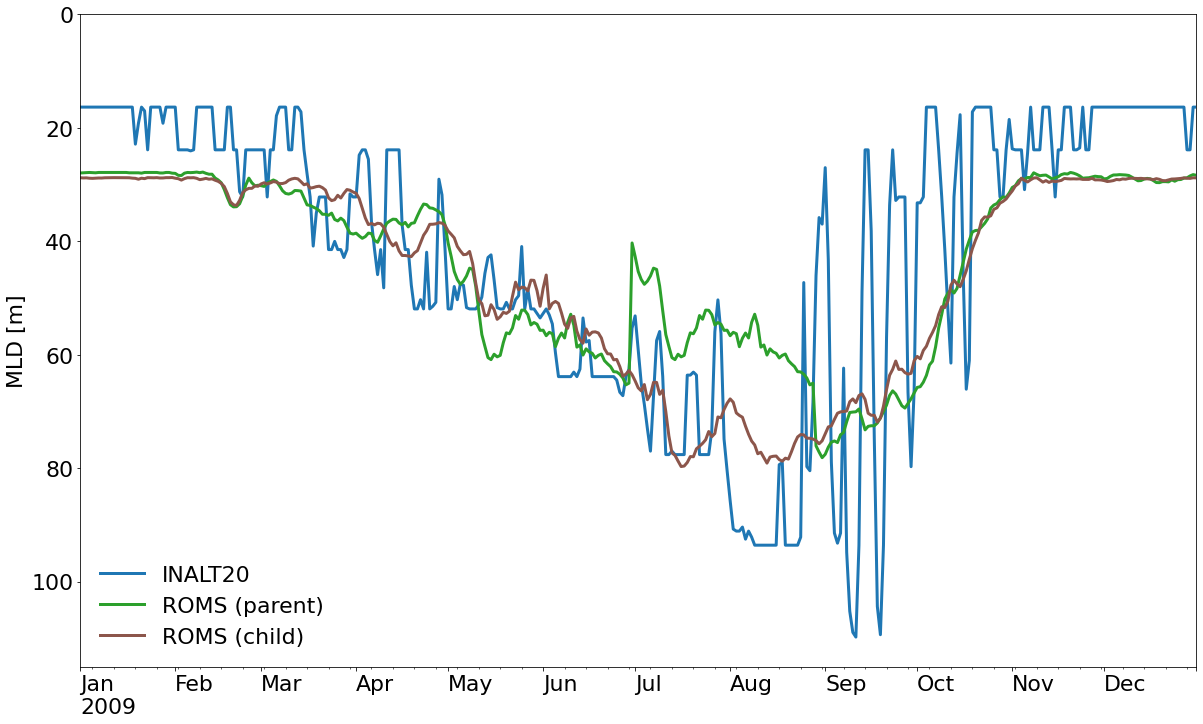

In [10]:
plt.rcParams['font.size'] = 22
plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(20,12))
plt.ylim([0,115])
MLD['INALT'].plot(color='tab:blue',label='INALT20',linewidth=3)
MLD['ROMS'].plot(color='tab:green',label='ROMS (parent)',linewidth=3)
MLD['ROMSchild'].plot(color='tab:brown',label='ROMS (child)',linewidth=3)
legend=plt.legend(title=' ')
legend.get_frame().set_alpha(0.0)
plt.ylabel('MLD [m]')
plt.xticks(ha='left')
plt.gca().invert_yaxis()
plt.savefig('../../output_data/MLDsALL.pdf', bbox_inches='tight');

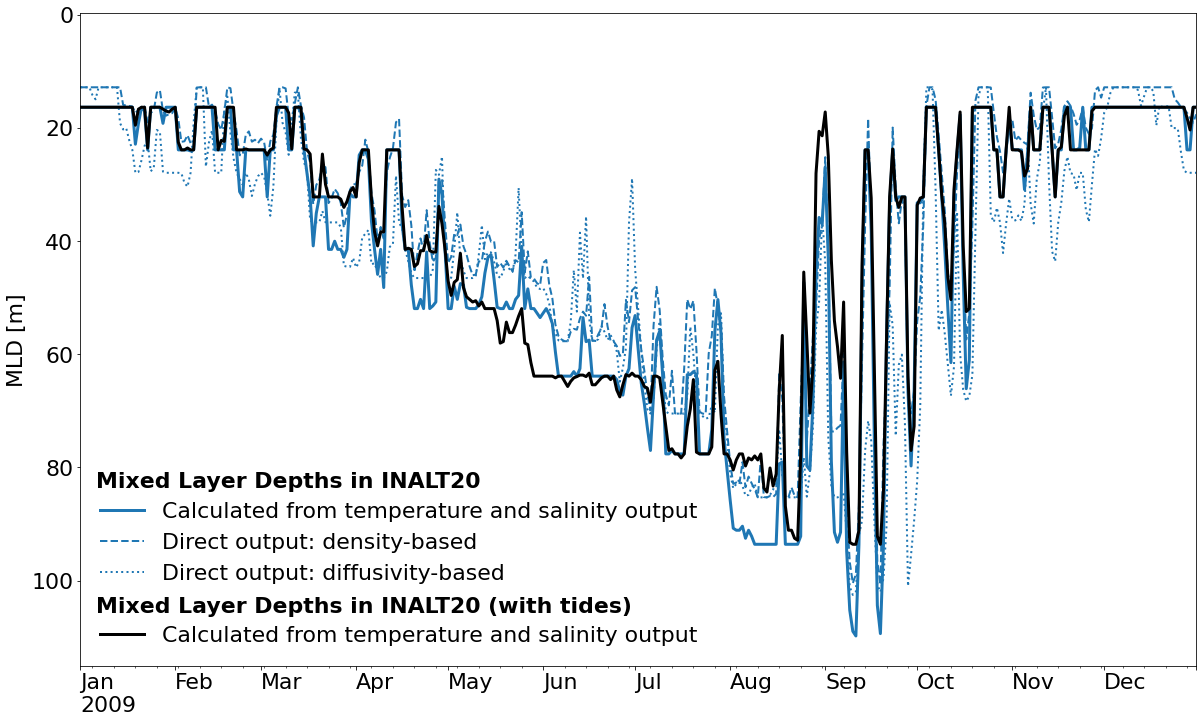

In [9]:
    plt.rcParams['font.size'] = 22
    plt.rcParams['font.family'] = 'Arial'

    plt.figure(figsize=(20,12))
    MLD['INALT'].plot(color='tab:blue',label='Calculated from temperature and salinity output',linewidth=3)
    MLD_Franziska_sliced.plot(color='tab:blue',label='Direct output: density-based',linestyle='dashed',linewidth=2) #.resample(time_counter='1M').mean()
    MLD_Franzsika_diffusivity.plot(color='tab:blue',label='Direct output: diffusivity-based',linestyle='dotted',linewidth=2)

    plt.plot(MLD_Franziska_sliced.index[0],5,label=' ',color='white')
    MLD_tides['INALT'].plot(color='black',label='Calculated from temperature and salinity output',linewidth=3)
    
    plt.xticks(ha='left')

    plt.ylabel('MLD [m]')
    legend=plt.legend(title=' ')
    legend.get_frame().set_alpha(0.0)
    plt.text('2009-01-06', 82.5, 'Mixed Layer Depths in INALT20', ha='left', va='center',color='black', fontweight='bold')
    plt.text('2009-01-06', 104.5, 'Mixed Layer Depths in INALT20 (with tides)', ha='left', va='center',color='black', fontweight='bold',zorder=10)
    plt.gca().invert_yaxis()
    plt.savefig('../../output_data/MLDsINALT.pdf', bbox_inches='tight')